# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hafizh Renanto Akhmad
- **Email:** hafizhrenanto88@gmail.com
- **ID Dicoding:** hafizh_renanto

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan rata-rata konsentrasi polutan utama (PM<sub>2.5</sub>, PM<sub>10</sub>, NO<sub>2</sub>, CO, SO<sub>2</sub>, dan O<sub>3</sub>) di Beijing setiap bulan dari tahun 2013 hingga 2017?
- Bagaimana hubungan antara polutan PM<sub>10</sub> dengan parameter meteorologi di Beijing dari tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

from functools import reduce

import folium

import datetime

## Data Wrangling

### Gathering Data

Data yang dipilih adalah air quality dataset, bersumber dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data). Dataset terdiri atas beberapa file CSV. 

Berikut adalah informasi untuk tiap variabel dalam dataset:
- No: row number 
- year: year of data in this row 
- month: month of data in this row 
- day: day of data in this row 
- hour: hour of data in this row 
- PM2.5: PM2.5 concentration (ug/m^3)
- PM10: PM10 concentration (ug/m^3)
- SO2: SO2 concentration (ug/m^3)
- NO2: NO2 concentration (ug/m^3)
- CO: CO concentration (ug/m^3)
- O3: O3 concentration (ug/m^3)
- TEMP: temperature (degree Celsius) 
- PRES: pressure (hPa)
- DEWP: dew point temperature (degree Celsius)
- RAIN: precipitation (mm)
- wd: wind direction
- WSPM: wind speed (m/s)
- station: name of the air-quality monitoring site

In [231]:

# Mendapatkan daftar nama file dataset
list_data = os.listdir('./data/')

# Mendapatkan nama stasiun dari nama file
file_name_pattern = r"PRSA_Data_(\w+)_\d{8}-\d{8}\.csv"
station_names = [
    re.search(pattern=file_name_pattern, string=data).group(1)
    for data in list_data if re.search(pattern=file_name_pattern, string=data)
]
list_station_names = [
    data
    for data in list_data if re.search(pattern=file_name_pattern, string=data)
]

dfs = {}
for file_name, station_name in zip(list_station_names, station_names):
    # Hanya memproses file CSV yang sesuai dengan pola
    if re.search(pattern=file_name_pattern, string=file_name):
        df = pd.read_csv(filepath_or_buffer='./data/' + file_name)
        dfs[station_name] = df

        # Tampilkan beberapa data untuk tiap dataframe
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            display(df.head())
            display(df.tail())
    else:
        print(f"File '{file_name}' does not match the pattern and will be skipped.")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping
35063,35064,2017,2,28,23,20.0,25.0,6.0,28.0,900.0,54.0,7.0,1009.4,-12.2,0.0,N,1.9,Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling
35063,35064,2017,2,28,23,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi
35063,35064,2017,2,28,23,30.0,71.0,11.0,87.0,1200.0,4.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan
35063,35064,2017,2,28,23,15.0,27.0,5.0,53.0,600.0,33.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Guanyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
35060,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
35061,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
35062,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng
35063,35064,2017,2,28,23,12.0,48.0,5.0,48.0,600.0,28.0,6.2,1010.5,-13.4,0.0,NNE,0.7,Gucheng


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou
35063,35064,2017,2,28,23,11.0,20.0,2.0,27.0,400.0,77.0,6.7,1009.3,-13.6,0.0,NE,1.9,Huairou


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan
35063,35064,2017,2,28,23,10.0,28.0,7.0,48.0,600.0,39.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Nongzhanguan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
35063,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan
35063,35064,2017,2,28,23,15.0,50.0,5.0,68.0,700.0,21.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Tiantan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu
35063,35064,2017,2,28,23,7.0,25.0,6.0,86.0,700.0,11.0,7.0,1012.6,-11.2,0.0,NE,1.1,Wanliu


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


**Insight:**
- Terdapat 12 lokasi pemantauan kualitas udara di Beijing.
- Data diambil setiap jam, mulai dari 1 Maret 2013 pukul 00:00 hingga 2 Februari 2017 pukul 23:00.

### Assessing Data

In [232]:
# Cek missing values untuk tiap station dalam percentage
for station_name, df in dfs.items():
    print(station_name)
    display(df.isnull().sum() / len(df) * 100)

Aotizhongxin


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Changping


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.207392
PM10       1.659822
SO2        1.791011
NO2        1.902236
CO         4.337782
O3         1.722564
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64

Dingling


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.221652
PM10       1.870865
SO2        2.081907
NO2        3.519279
CO         5.738079
O3         3.462240
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64

Dongsi


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.138946
PM10       1.577116
SO2        1.890828
NO2        4.565937
CO         9.117614
O3         1.893680
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Guanyuan


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.756788
PM10       1.223477
SO2        1.351814
NO2        1.879420
CO         4.999430
O3         3.345311
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Gucheng


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.842345
PM10       1.086585
SO2        1.445927
NO2        1.905088
CO         3.995551
O3         2.079055
TEMP       0.145448
PRES       0.142596
DEWP       0.145448
RAIN       0.122633
wd         0.453457
WSPM       0.119781
station    0.000000
dtype: float64

Huairou


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.717887
PM10       2.215948
SO2        2.794889
NO2        4.674310
CO         4.055441
O3         3.282569
TEMP       0.145448
PRES       0.151152
DEWP       0.151152
RAIN       0.156856
wd         0.861282
WSPM       0.139744
station    0.000000
dtype: float64

Nongzhanguan


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.791011
PM10       1.254848
SO2        1.271960
NO2        1.973534
CO         3.439425
O3         1.443076
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Shunyi


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.603810
PM10       1.562856
SO2        3.696099
NO2        3.892882
CO         6.211499
O3         4.246521
TEMP       0.145448
PRES       0.145448
DEWP       0.154004
RAIN       0.145448
wd         1.377481
WSPM       0.125485
station    0.000000
dtype: float64

Tiantan


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.930755
PM10       1.702601
SO2        3.188455
NO2        2.121834
CO         3.211271
O3         2.404175
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Wanliu


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.089436
PM10       0.809948
SO2        1.639859
NO2        3.051563
CO         5.167693
O3         6.009012
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.350787
WSPM       0.039927
station    0.000000
dtype: float64

Wanshouxigong


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.984942
PM10       1.380333
SO2        1.907940
NO2        2.150354
CO         3.698950
O3         3.074378
TEMP       0.054187
PRES       0.054187
DEWP       0.054187
RAIN       0.054187
wd         0.225302
WSPM       0.037075
station    0.000000
dtype: float64

In [233]:
# Cek duplicate data untuk tiap station
for station_name, df in dfs.items():
    print(f"Untuk dataset station {station_name}, terdapat {df.duplicated().sum()} nilai duplikat")

Untuk dataset station Aotizhongxin, terdapat 0 nilai duplikat
Untuk dataset station Changping, terdapat 0 nilai duplikat
Untuk dataset station Dingling, terdapat 0 nilai duplikat
Untuk dataset station Dongsi, terdapat 0 nilai duplikat
Untuk dataset station Guanyuan, terdapat 0 nilai duplikat
Untuk dataset station Gucheng, terdapat 0 nilai duplikat
Untuk dataset station Huairou, terdapat 0 nilai duplikat
Untuk dataset station Nongzhanguan, terdapat 0 nilai duplikat
Untuk dataset station Shunyi, terdapat 0 nilai duplikat
Untuk dataset station Tiantan, terdapat 0 nilai duplikat
Untuk dataset station Wanliu, terdapat 0 nilai duplikat
Untuk dataset station Wanshouxigong, terdapat 0 nilai duplikat


**Insight:**
- Berdasarkan perhitungan banyak missing values, setiap stasiun memiliki  banyak data yang hilang relatif sedikit untuk semua konsentrasi polutan (0.5%-6%)
- Tidak ada duplikasi data pada untuk dataset tiap kota, menandakan bahwa tiap baris menunjukkan data untuk jam yang berbeda.

### Cleaning Data

In [234]:
# Lakukan interpolation untuk mengatasi missing values untuk kolom-kolom konsentrasi partkulat dan parameter meteorologi kecuali WSPM (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN)
# Hal ini dilakukan karena data merupakan time series
# Kolom WSPM tidak dilakukan interpolasi karena WSPM merupakan magnitude dari vektor dengan arah ditunjukkan oleh kolom wd atau wind direction, sehingga tidak cocok jika dilakukan interpolasi secara langsung pada kolom WSPM
interpolate_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']

for station_name, df in dfs.items():
    for col in interpolate_cols:
        df[col] = df[col].interpolate(method='linear', limit_direction='both')

    print(f"{station_name} Station")
    display(df.isnull().sum() / len(df) * 100)

Aotizhongxin Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Changping Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64

Dingling Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64

Dongsi Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Guanyuan Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Gucheng Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.453457
WSPM       0.119781
station    0.000000
dtype: float64

Huairou Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.861282
WSPM       0.139744
station    0.000000
dtype: float64

Nongzhanguan Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Shunyi Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         1.377481
WSPM       0.125485
station    0.000000
dtype: float64

Tiantan Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64

Wanliu Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.350787
WSPM       0.039927
station    0.000000
dtype: float64

Wanshouxigong Station


No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.225302
WSPM       0.037075
station    0.000000
dtype: float64

In [235]:
# Untuk kolom wd dan WSPM, dilakukan dropping pada row dengan missing values untuk minimal salah satu dari kedua parameter tersebut.
# Dropping dipilih karena data yang hilang tidaklah banyak. Paling besar hanya 1%.
# Untuk menyeragamkan banyak data tiap station, jika pada suatu jam di hari tertentu di suatu station, terdapat missing values pada salah satu kolom tersebut, data pada jam di hari tersebut akan didrop untuk semua station.
drop_cols = ['wd', 'WSPM']

# Index yang sama di dataframe yang berbeda menandakan waktu (jam, hari, bulan, tahun) yang sama untuk dataframe yang berbeda.
# Rekap index untuk row yang akan didrop
no_to_drop = set()
for station_name, df in dfs.items():
    missing_no = df[df[drop_cols].isnull().any(axis=1)].index
    no_to_drop.update(missing_no)

for station_name, df in dfs.items():
    df.drop(index=no_to_drop, inplace=True)

    print(f"{station_name} Station, {len(df)} Rows")
    display(df.isnull().sum() / len(df) * 100)

Aotizhongxin Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Changping Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Dingling Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Dongsi Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Guanyuan Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Gucheng Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Huairou Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Nongzhanguan Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Shunyi Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Tiantan Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Wanliu Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Wanshouxigong Station, 34038 Rows


No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

**Insight:**
- Telah dilakukan penanganan missing values untuk kolom-kolom konsentrasi polutan udara serta parameter meteorologi (kecuali angin) dengan interpolasi linear
- Telah dilakukan penanganan missing values untuk kolom-kolom parameter angin dengan penghapusan atau dropping

## Exploratory Data Analysis (EDA)

### Explore using merged dataframe

In [236]:
# Dapatkan dataframe gabungan
merged_df = pd.concat(objs=dfs.values(), axis=0, ignore_index=True)

# Cek parameter statistik dari data
merged_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456.00000,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456.000000,408456,408456.000000,408456
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41460,NaN,34038
mean,17250.912656,2014.631324,6.513573,15.703067,11.513926,78.982522,104.23548,15.997102,50.174601,1220.854493,58.173788,13.698559,1010.635751,2.513484,0.065448,NaN,1.750531,NaN
std,10073.420902,1.172082,3.429668,8.803517,6.881957,80.247893,92.00464,22.031512,35.021983,1145.930537,57.439021,11.438631,10.485907,13.838963,0.829710,NaN,1.250347,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.00000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8529.000000,2014.000000,4.000000,8.000000,6.000000,20.000000,36.00000,3.000000,23.000000,500.000000,11.000000,3.400000,1002.100000,-9.000000,0.000000,NaN,0.900000,NaN
50%,17083.500000,2015.000000,7.000000,16.000000,12.000000,54.000000,82.00000,7.000000,43.000000,900.000000,45.838800,14.700000,1010.200000,3.100000,0.000000,NaN,1.400000,NaN
75%,25987.000000,2016.000000,9.000000,23.000000,17.000000,110.000000,145.00000,20.000000,71.000000,1500.000000,83.000000,23.400000,1019.000000,15.200000,0.000000,NaN,2.200000,NaN


In [237]:
# Cek korelasi tiap variabel
merged_df.select_dtypes(include='number').corr()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969589,0.041328,0.016448,0.000926,-0.037780,-0.057995,-0.229979,-0.064076,0.004377,-0.024384,-0.109168,0.180067,-0.100585,0.006457,0.073137
year,0.969589,1.000000,-0.203594,-0.007164,0.000540,-0.037894,-0.049127,-0.173806,-0.071285,-0.006331,0.001745,-0.138174,0.177977,-0.162251,0.002485,0.105149
month,0.041328,-0.203594,1.000000,0.011356,-0.001266,0.002488,-0.034229,-0.212878,0.032784,0.043687,-0.104084,0.129054,-0.010518,0.261323,0.016248,-0.136354
day,0.016448,-0.007164,0.011356,1.000000,0.000412,0.007164,0.029611,-0.000530,0.014979,-0.013727,0.000497,0.015241,0.019991,0.023359,-0.003937,-0.012068
hour,0.000926,0.000540,-0.001266,0.000412,1.000000,0.007987,0.046938,0.028156,-0.007888,-0.033748,0.281564,0.143729,-0.039887,-0.012170,0.013063,0.143247
PM2.5,-0.037780,-0.037894,0.002488,0.007164,0.007987,1.000000,0.876474,0.482639,0.662179,0.776705,-0.143886,-0.123436,0.014594,0.119403,-0.014007,-0.270213
PM10,-0.057995,-0.049127,-0.034229,0.029611,0.046938,0.876474,1.000000,0.463465,0.643058,0.687386,-0.105428,-0.088552,-0.023476,0.072667,-0.026270,-0.176396
SO2,-0.229979,-0.173806,-0.212878,-0.000530,0.028156,0.482639,0.463465,1.000000,0.501326,0.530203,-0.168714,-0.320975,0.221991,-0.263068,-0.040224,-0.113054
NO2,-0.064076,-0.071285,0.032784,0.014979,-0.007888,0.662179,0.643058,0.501326,1.000000,0.693253,-0.464803,-0.273509,0.172030,-0.029543,-0.043203,-0.395037
CO,0.004377,-0.006331,0.043687,-0.013727,-0.033748,0.776705,0.687386,0.530203,0.693253,1.000000,-0.304350,-0.318297,0.184221,-0.055513,-0.012618,-0.289478


In [238]:
# Dilakukan pengelompokkan berdasarkan tahun dan diambil nilai rata-rata
merged_df.select_dtypes(include='number').groupby(by='year').mean()

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3669.232491,7.495836,15.795222,11.507304,79.582966,103.099331,20.000730,52.011656,1203.601278,56.347919,15.689490,1007.732071,5.453861,0.066268,1.601276
2014,11722.162724,6.522683,15.724946,11.499372,86.181709,116.819085,21.202416,55.043959,1270.658661,57.906443,13.917568,1010.642071,2.741809,0.049716,1.638273
2015,20464.174689,6.500958,15.654095,11.545378,78.170345,102.774863,13.038162,47.764872,1244.345128,60.665968,13.619057,1010.999616,2.606286,0.077150,1.803924
2016,29171.971678,6.399857,15.710206,11.502271,70.412941,93.199530,9.810717,45.178336,1112.711827,59.953005,13.734360,1011.159124,2.021469,0.078739,1.891937
2017,34380.793076,1.507246,15.286634,11.522544,87.915875,106.450517,17.287339,54.898128,1542.342079,42.079475,0.706862,1021.743289,-13.745949,0.003207,2.109991


In [239]:
# Dilakukan pengelompokkan berdasarkan bulan dan diambil nilai rata-rata
merged_df.select_dtypes(include='number').groupby(by='month').mean()

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20257.347425,2015.431261,15.907282,11.507638,92.359906,112.223547,32.025026,60.832085,1851.544198,27.473721,-1.760299,1022.023872,-14.910664,0.000373,1.902235
2,21520.915400,2015.493957,14.642885,11.527096,87.570493,102.707855,29.250549,51.122114,1394.201863,41.139360,1.170551,1020.472904,-13.135585,0.009370,2.043311
3,13469.866779,2014.494435,16.007083,11.512310,94.471359,136.663212,27.994402,59.928605,1308.566751,50.820234,8.357558,1013.948594,-7.949028,0.007614,1.979680
4,14147.634284,2014.488560,15.388948,11.538191,73.179718,117.183040,14.323185,47.468518,835.977810,70.722131,15.351381,1008.312817,0.112936,0.023199,2.190778
5,14888.151495,2014.489130,16.037704,11.529212,63.633638,108.777502,14.684046,42.679415,808.881138,93.137527,21.550362,1002.376950,6.875651,0.046136,2.077239
6,15671.523109,2014.495098,15.496148,11.523109,68.996250,86.765252,7.931986,39.038487,982.577169,95.198854,24.588868,999.317063,15.620536,0.132216,1.581977
7,16324.851688,2014.486192,15.975111,11.518923,71.545441,84.937529,5.557107,35.622122,906.525100,96.904795,27.242982,998.128961,19.908086,0.270295,1.507433
8,17045.495199,2014.483539,15.970508,11.540466,53.532116,71.601611,4.709594,35.833786,831.655258,88.668052,26.686437,1001.210511,18.920488,0.097465,1.457467
9,17481.502183,2014.450146,15.342795,11.445415,60.881767,79.105833,6.393034,44.924023,927.037312,55.637902,20.867824,1008.604021,13.979033,0.128654,1.367998


In [240]:
# Dilakukan pengelompokkan berdasarkan bulan dan tahun dan diambil nilai rata-rata
merged_df.select_dtypes(include='number').groupby(by=['year','month']).mean()

No        day       hour       PM2.5        PM10  \
year month                                                               
2013 3        372.500000  16.000000  11.500000  104.571909  130.249832   
     4       1104.500000  15.500000  11.500000   62.207292   95.931510   
     5       1836.500000  16.000000  11.500000   81.876512  134.408462   
     6       2568.500000  15.500000  11.500000  101.542242  115.859546   
     7       3300.987887  16.020188  11.503365   66.710550   76.332466   
     8       4045.264586  16.028494  11.580733   60.330054   77.450531   
     9       4773.703081  15.385154  11.459384   75.197622   95.742265   
     10      5508.500000  16.000000  11.500000   91.765320  112.675042   
     11      6239.601955  15.460894  11.540503   73.392167   95.960894   
     12      6972.779273  16.012113  11.488560   77.773161   95.710633   
2014 1       7716.500000  16.000000  11.500000   98.390065  123.645105   
     2       8424.500000  14.500000  11.500000  153.808780  156.681982   
     3       9132.500000  16.000000  11.500000   95.227431  136.205645   
     4       9864.500000  15.500000  11.500000   91.825231  144.124306   
     5      10596.500000  16.000000  11.500000   62.177315  116.993721   
     6      11328.500000  15.500000  11.500000   54.435571   74.037310   
     7      12061.878543  16.056680  11.518219   89.328228  110.050849   
     8      12804.500000  16.000000  11.500000   63.157616   85.454615   
     9      13536.671766  15.507650  11.488178   66.268034   90.278002   
     10     14268.500000  16.000000  11.500000  119.375728  146.505544   
     11     15000.353760  15.494429  11.487465   86.931772  125.089044   
     12     15732.368421  15.994602  11.497976   58.214258   95.404884   
2015 1      16468.997241  15.686897  11.511724   97.880565  115.772462   
     2      17178.359589  14.239726  11.606164   88.665967  117.252607   
     3      17892.500000  16.000000  11.500000   86.384123  146.016252   
     4      18616.989914  15.180115  11.667147   71.917295  114.925308   
     5      19356.226648  15.984890  11.589286   55.684820   95.829567   
     6      20087.681948  15.462751  11.575931   61.014199   80.932450   
     7      20820.646091  16.005487  11.514403   60.997714   75.515352   
     8      21563.892116  15.973721  11.522822   44.178952   64.672115   
     9      22299.254786  15.615611  11.480118   48.712417   62.392033   
     10     23024.865782  15.849558  11.476401   67.493239   86.691186   
     11     23758.872504  15.428571  11.586790  110.093181  115.550724   
     12     24494.898470  16.098748  11.528512  147.304609  157.361749   
2016 1      25238.309264  16.076294  11.478202   65.690168   81.431312   
     2      25957.572901  15.044183  11.512518   41.085870   55.493373   
     3      26677.237381  16.028649  11.549795   91.660414  134.143872   
     4      27405.315417  15.367751  11.489392   66.604750  113.604903   
     5      28144.550824  16.167582  11.528846   54.426968   87.134362   
     6      28873.019499  15.520891  11.518106   58.720547   76.023642   
     7      29600.073611  15.813889  11.540278   68.912904   77.511637   
     8      30345.592697  15.876404  11.558989   45.935042   58.108263   
     9      31063.966981  14.817610  11.344340   51.713121   65.642732   
     10     31807.211161  15.776772  11.568627   84.205345   98.874204   
     11     32551.596358  15.792109  11.585736   95.517198  127.723508   
     12     33278.988218  16.110457  11.337261  122.318422  143.040562   
2017 1      34017.017974  15.852941  11.547386  110.475381  131.064883   
     2      34734.174603  14.736508  11.498413   66.000926   82.539418   

                  SO2        NO2           CO          O3       TEMP  \
year month                                                             
2013 3      38.530270  67.224501  1449.916555   56.343421   5.992249   
     4      20.686866  46.141377   893.442556   62.019991  12.380058   
     5      26.376841  50.161956 

In [241]:
# Dilakukan pengelompokkan berdasarkan bulan dan diambil nilai rata-rata
merged_df.select_dtypes(include='number').groupby(by='day').mean()

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,16938.087422,2014.640500,6.457627,11.563782,88.032634,109.937873,13.802674,49.717744,1316.880963,55.262544,13.540911,1009.924633,2.714266,0.125885,1.739340
2,16958.807692,2014.637746,6.486583,11.510733,73.383788,91.834267,16.205512,49.934307,1231.001574,54.932839,13.633454,1009.277448,2.208333,0.058997,1.729159
3,16923.974107,2014.626786,6.537500,11.502679,81.253560,107.837814,16.293868,51.152802,1317.224106,60.223310,14.112805,1009.406146,1.752403,0.003914,1.847798
4,17017.036380,2014.637977,6.497782,11.557232,86.294080,109.529100,15.165723,52.033823,1403.857687,59.774449,13.731879,1009.743621,2.560189,0.110300,1.762437
5,17094.553792,2014.645503,6.480600,11.437390,75.502738,100.090904,14.419539,46.179156,1221.707024,64.159021,13.819727,1010.903728,2.319672,0.042798,1.825661
6,17083.057829,2014.640569,6.491103,11.524021,84.593431,106.023672,17.691859,49.384028,1298.250513,60.128618,13.452916,1011.284303,2.226134,0.068757,1.641704
7,17153.958296,2014.643301,6.522626,11.527950,83.489531,103.159293,16.410510,49.230772,1300.578436,59.245297,13.663384,1011.094735,2.906418,0.117436,1.701538
8,17137.467972,2014.644128,6.457295,11.464413,81.612603,102.732889,17.372532,47.720505,1197.438835,60.467644,13.280279,1011.191096,1.668520,0.034668,1.899051
9,17231.651943,2014.651060,6.469965,11.478799,70.843117,97.111076,14.155199,46.995863,1111.585004,58.091033,12.699164,1011.656584,1.502275,0.036396,1.839547


In [242]:
# Dilakukan pengelompokkan berdasarkan bulan dan station dan diambil nilai rata-rata
merged_df.select_dtypes(include='number').groupby(by='day').mean()

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,16938.087422,2014.640500,6.457627,11.563782,88.032634,109.937873,13.802674,49.717744,1316.880963,55.262544,13.540911,1009.924633,2.714266,0.125885,1.739340
2,16958.807692,2014.637746,6.486583,11.510733,73.383788,91.834267,16.205512,49.934307,1231.001574,54.932839,13.633454,1009.277448,2.208333,0.058997,1.729159
3,16923.974107,2014.626786,6.537500,11.502679,81.253560,107.837814,16.293868,51.152802,1317.224106,60.223310,14.112805,1009.406146,1.752403,0.003914,1.847798
4,17017.036380,2014.637977,6.497782,11.557232,86.294080,109.529100,15.165723,52.033823,1403.857687,59.774449,13.731879,1009.743621,2.560189,0.110300,1.762437
5,17094.553792,2014.645503,6.480600,11.437390,75.502738,100.090904,14.419539,46.179156,1221.707024,64.159021,13.819727,1010.903728,2.319672,0.042798,1.825661
6,17083.057829,2014.640569,6.491103,11.524021,84.593431,106.023672,17.691859,49.384028,1298.250513,60.128618,13.452916,1011.284303,2.226134,0.068757,1.641704
7,17153.958296,2014.643301,6.522626,11.527950,83.489531,103.159293,16.410510,49.230772,1300.578436,59.245297,13.663384,1011.094735,2.906418,0.117436,1.701538
8,17137.467972,2014.644128,6.457295,11.464413,81.612603,102.732889,17.372532,47.720505,1197.438835,60.467644,13.280279,1011.191096,1.668520,0.034668,1.899051
9,17231.651943,2014.651060,6.469965,11.478799,70.843117,97.111076,14.155199,46.995863,1111.585004,58.091033,12.699164,1011.656584,1.502275,0.036396,1.839547


In [243]:
# Dilakukan pengelompokkan berdasarkan arah angin dan diambil nilai rata-rata
merged_df.loc[:, merged_df.columns!='station'].groupby(by='wd').mean()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
wd,,,,,,,,,,,,,,,,
E,16983.596039,2014.587946,6.670536,15.725538,10.577992,100.830132,123.490684,18.529790,59.320804,1567.003807,48.536096,14.113653,1010.092891,5.728531,0.078846,1.319149
ENE,17478.342985,2014.626970,6.876070,15.780309,9.809537,96.022948,117.761687,18.735120,63.329916,1585.112717,36.632512,11.983798,1012.029893,3.668152,0.100529,1.353935
ESE,16856.537270,2014.589419,6.478513,15.723052,11.546530,101.251231,124.990494,18.583421,54.746197,1460.679146,62.060740,15.566728,1009.087066,6.377878,0.083577,1.557869
N,16429.450592,2014.526307,6.656620,15.464109,10.524754,66.725458,89.326766,12.390705,47.075309,1098.162028,43.470909,11.516528,1011.676654,0.454078,0.056316,1.624205
NE,18182.921298,2014.727062,6.629595,16.000265,9.474988,84.741314,105.560345,17.482992,59.322247,1398.852858,35.287563,11.008071,1012.800125,2.070989,0.087873,1.422132
NNE,17427.387439,2014.635950,6.707381,15.463960,9.988089,70.385567,90.318955,14.055876,50.244664,1192.161576,40.585718,12.042158,1011.918740,1.964779,0.097629,1.539451
NNW,17995.355290,2014.722036,6.456537,15.271429,10.722843,52.848064,76.558463,10.792721,36.433201,918.142021,50.006912,10.579484,1012.212702,-2.902045,0.064245,2.151987
NW,19619.043351,2014.916823,6.332645,15.497380,11.091403,50.433623,77.838589,10.155713,35.216169,872.062252,51.869752,9.945572,1012.826782,-4.282453,0.044094,2.503017
S,16912.835254,2014.605495,6.360617,15.714822,13.683124,89.063040,116.395789,18.528411,47.836426,1206.724514,93.323158,18.700569,1007.921627,6.287404,0.035029,1.741765


**Insight:**
- Dari statistik deskriptif menggunakan fungsi `describe()`, dapat dilihat bahwa konsentrasi semua polutan sangat tersebar. Sebagai contoh, konsentrasi partkulat PM2.5 memiliki nilai rata-rata 78.98 dengan standar deviasi 80.25.
- Secara keseluruhan, menggunakan nilai rata-rata dari semua station yang ada di dataset, diperoleh beberapa hubungan antar variabel sebagai berikut:
    - PM2.5 dan PM10 cukup berkorelasi dengan koefisien korelasi Pearson sebesar ~0.8
    - Polutan O3 memiliki korelasi paling besar terhadap temperatur dibandingkan dengan polutan lain, dengan koefisien korelasi Pearson sebesar ~0.6
    - Temperature (TEMP) dan dew point temepratur (DEWP) berkorelasi cukup tinggi antara satu sama lain (>0.8). Kedua variabel tersebut juga berkorelasi negatif cukup tinggi terhadap pressure (PRES)
    - Polutan NO2 memiliki korelasi yang paling tinggi terhadap rain precipitation (RAIN), dengan koefisien korelasi Pearson sebesar ~0.39 yang masih tergolong rendah.
- Dengan pivot tabel terhadap bulan dan tahun, bisa diperoleh data tren, yang dapat lebih jelas dilihat dengan visualisasi
- Untuk analisis yang lebih dalam, bisa dilakukan agregasi data berdasarkan station. Namun, karena cukup banyak station yang ada, tidak akan ditampilkan agregasi tersebut.

## Visualization & Explanatory Analysis

### Bagaimana tren perubahan rata-rata konsentrasi polutan utama (PM2.5, PM10, NO2, CO, SO2, dan O3) di Beijing setiap bulan dari tahun 2013 hingga 2017?

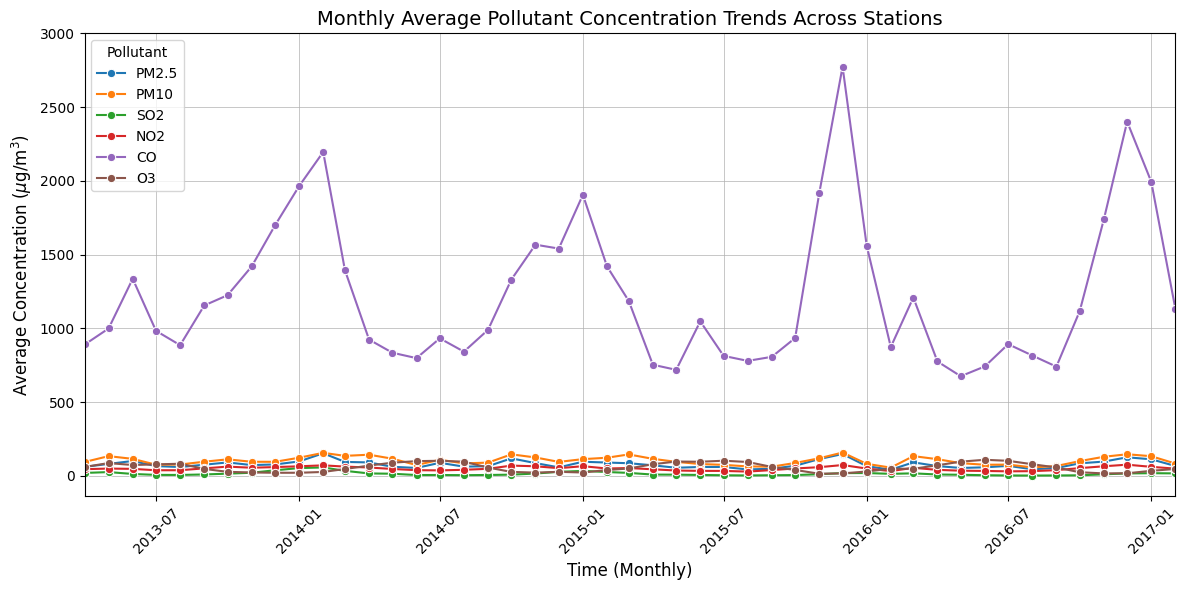

In [244]:
# Tren perubahan rata-rata konsentrasi polutan di Beijing didapatkan dengan mencari rata-rata konsentrasi polutan

# Rekap kolom polutan
polutan_col = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Dapatkan kolom datetime
merged_df['datetime'] = pd.to_datetime(merged_df[['year','month','day']])

# Lakukan pivoting pada merged_df terhadap datetime untuk mendapatkan rata-rata konsentrasi polutan dari seluruh station di Beijing
merged_df_avg_station = merged_df.groupby('datetime')[polutan_col].mean().reset_index()

# Buat kolom untuk menyatakan bulan dan tahun
merged_df_avg_station['month_year'] = merged_df_avg_station['datetime'].dt.to_period('M')

# Lakukan pivoting terhadap dataframe hasil pivoting sebelumnya terhadap kolom bulan-tahun
merged_df_avg_month = merged_df_avg_station.groupby('month_year')[polutan_col].mean().reset_index()
merged_df_avg_month['month_year'] = merged_df_avg_month['month_year'].dt.to_timestamp()

# Lakukan melt untuk 'unpivot' dataframe
merged_df_avg_month_melted = merged_df_avg_month.melt(id_vars='month_year', value_vars=polutan_col, 
                               var_name='Pollutant', value_name='Average Concentration')

# Lakukan plot dengan seaborn
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(111)

sns.lineplot(data=merged_df_avg_month_melted, x='month_year', y='Average Concentration', hue='Pollutant', marker='o', ax=ax1)

ax1.set_aspect('auto')
ax1.set_xlim(left=merged_df_avg_station['month_year'].min(), right=merged_df_avg_station['month_year'].max()-1)
ax1.set_ylim(top=3000)

ax1.set_xlabel('Time (Monthly)', fontsize=12)
ax1.set_ylabel('Average Concentration ($\mu$g/$\mathregular{m}^3$)', fontsize=12)

ax1.set_title('Monthly Average Pollutant Concentration Trends Across Stations', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

ax1.grid(True,linewidth=0.5)

plt.tight_layout()

plt.show()

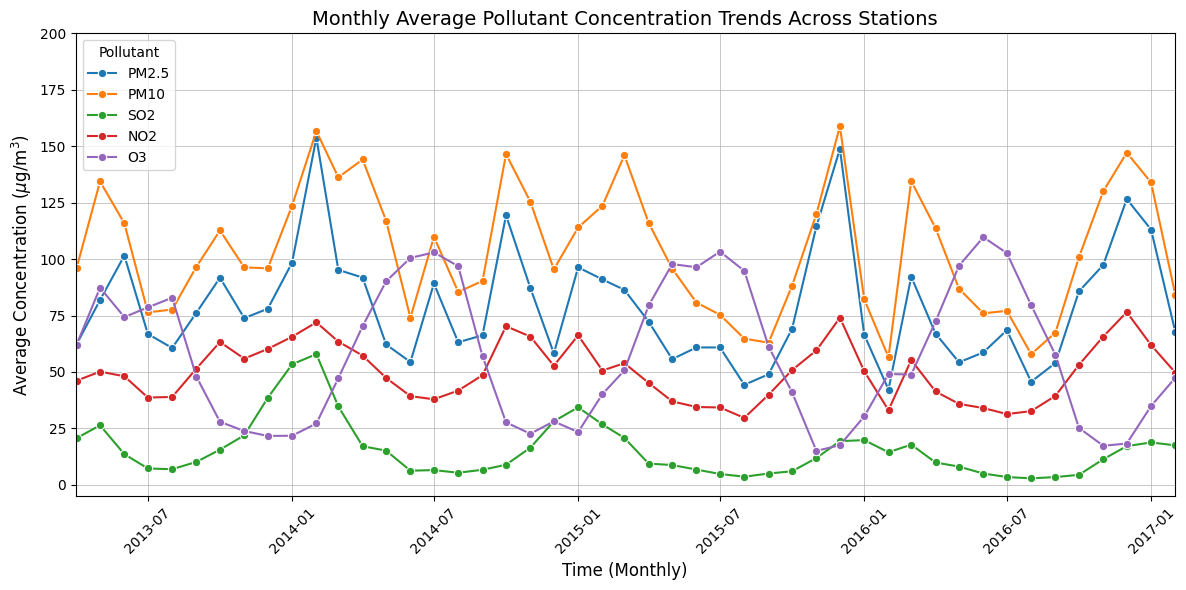

In [245]:
# Karena nilai rata-rata konsentrasi CO jauh lebih besar daripada yang lain, tren untuk konsentrasi polutan lain kurang terlihat. Oleh karena itu, dibuat plot baru tanpa menyertakan polutan CO

# Lakukan plot dengan seaborn
fig2 = plt.figure(figsize=(12, 6))
ax2 = fig2.add_subplot(111)

sns.lineplot(data=merged_df_avg_month_melted.loc[merged_df_avg_month_melted["Pollutant"]!="CO"], x='month_year', y='Average Concentration', hue='Pollutant', marker='o', ax=ax2)

ax2.set_aspect('auto')
ax2.set_xlim(left=merged_df_avg_station['month_year'].min(), right=merged_df_avg_station['month_year'].max()-1)
ax2.set_ylim(top=200)

ax2.set_xlabel('Time (Monthly)', fontsize=12)
ax2.set_ylabel('Average Concentration ($\mu$g/$\mathregular{m}^3$)', fontsize=12)

ax2.set_title('Monthly Average Pollutant Concentration Trends Across Stations', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

ax2.grid(True,linewidth=0.5)

plt.tight_layout()

plt.show()

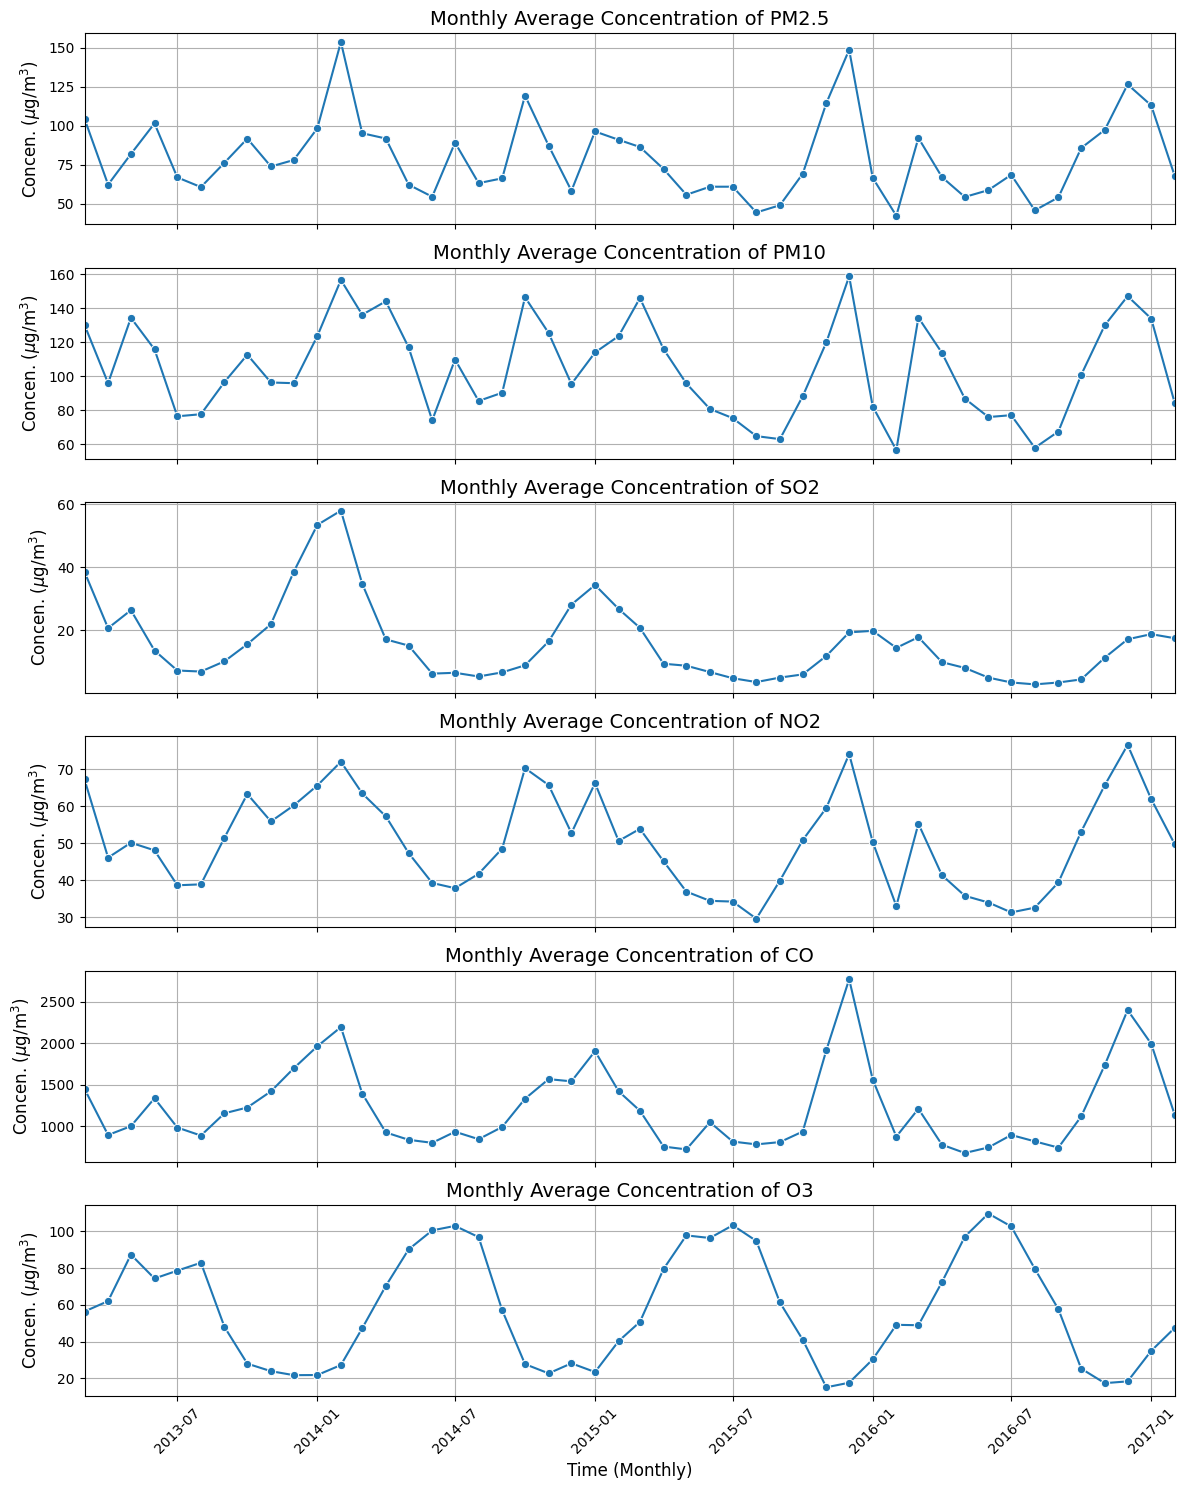

In [246]:
# Buat subplot
fig3, axes3 = plt.subplots(len(polutan_col), 1, figsize=(12, len(polutan_col) * 2.5), sharex=True)

# Lakukan loop untuk membuat subplot tiap polutan
for i, polutan in enumerate(polutan_col):
    # Filter data yang ingin diplot
    polutan_df = merged_df_avg_month_melted[merged_df_avg_month_melted['Pollutant'] == polutan]
    
    # Plotting
    sns.lineplot(data=polutan_df, x='month_year', y='Average Concentration', marker='o', ax=axes3[i])
    axes3[i].set_title(f'Monthly Average Concentration of {polutan}', fontsize=14)
    
    axes3[i].set_ylabel('Concen. ($\mu$g/$\mathregular{m}^3$)', fontsize=12)
    
    axes3[i].grid(True)
    
    axes3[i].set_xlim(left=polutan_df['month_year'].min(), right=polutan_df['month_year'].max())

# Tambahkan label x-axis pada subplot paling bawah
axes3[-1].set_xlabel('Time (Monthly)', fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

ax1.grid(True,linewidth=0.5)

plt.tight_layout()

plt.show()


### Bagaimana hubungan antara polutan PM10 dengan parameter meteorologi di Beijing dari tahun 2013 hingga 2017?

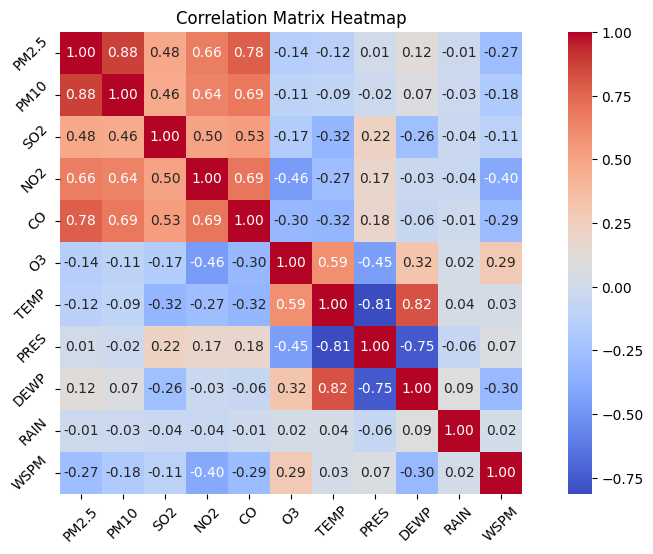

In [247]:
# Pada bagian exploratory data analysis, telah dilihat korelasi satu variabel dengan lainnya. Pada bagian ini, akan dibuat heatmap dari matriks korelasi yang sudah dibuat serta dianalisis lebih dalam untuk polutan partikulat PM10
included_col = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
corr_mat = merged_df[included_col].corr()

# Lakukan plot dengan seaborn
fig4 = plt.figure(figsize=(12, 6))
ax4 = fig4.add_subplot(111)

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=ax4)

ax4.set_title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Analisis Lanjutan (Opsional)

Untuk analisis lanjutan ini, akan dilakukan geospatial analysis, yakni untuk melihat bagaimana distribusi konsentrasi polusi di Beijing berdasarkan lokasi tiap station. Koordinat geografis dari semua station yang ada didapatkan dari [artikel](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9510312/) oleh Wu, Zie, dan Kang (2022). Pada bagian ini, akan digunakan libray Folium

In [248]:
# Simpan koordinat tiap stasiun
station_coordinates = {
    "Aotizhongxin": [39.982, 116.397],
    "Changping": [40.217, 116.230],
    "Dingling": [40.292, 116.220],
    "Dongsi": [39.929, 116.417],
    "Guanyuan": [39.929, 116.339],
    "Gucheng": [39.914, 116.184],
    "Huairou": [40.328, 116.628],
    "Nongzhanguan": [39.937, 116.461],
    "Shunyi": [40.127, 116.655],
    "Tiantan": [39.886, 116.407],
    "Wanliu": [39.987, 116.287],
    "Wanshouxigong": [39.878, 116.352]
} 

Pertama-tama, dilakukan anotasi lokasi tiap stasiun dan [keliling wilayah Beijing](https://github.com/d3cn/data/blob/master/json/geo/china/province-city/beijing.geojson) pada peta.

In [249]:
# Buat peta dengan titik tengah koordinat di Beijing
center_peta = [40.1042, 116.4074]  
beijing_peta = folium.Map(location=center_peta, zoom_start=9)

# Beri tanda untuk tiap stasiun
for station, location in station_coordinates.items():
    folium.Marker(location, popup=station).add_to(beijing_peta)

# Tambahkan anotasi keliling Beijing dari GeoJSON
folium.GeoJson("./data/circum.json", name="Beijing").add_to(beijing_peta)

# Tampilkan peta
beijing_peta


Selanjutnya, warna tiap anotasi station diubah sesuai dengan tingkat kebahayaan konsentrasi polutan. Menggunakan [guidline](https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health) dari WHO, didapatkan batas-batas sebagai berikut:

![image.png](https://cdn.who.int/media/images/default-source/air-pollution/recommended-aqg-levels-and-interim-targets.jpg?sfvrsn=9f9136ef_2)

Batas atas yang dipakai adalah yang diukur dalam 24-hour averaging time serta 8-hour averaging time khusus untuk ozone.

Sebagai contoh, akan ditampilkan peta beserta anotasi lokasi station pada tanggal 1 Oktober 2013 dengan warna indikator berdasarkan konsentrasi polutan PM<sub>10</sub>.

In [250]:
def getAnnotationColor(polutan, konsentrasi):
    # Lakukan conditional yang terpisah karena tiap polutan memiliki persyaratan interim yang berbeda
    if polutan == 'PM2.5':
        if konsentrasi >= 75:
            color = 'darkpurple'
        elif konsentrasi >= 50:
            color = 'darkred'
        elif konsentrasi >= 37.5:
            color = 'red'
        elif konsentrasi >= 25:
            color = 'orange'
        elif konsentrasi >= 15:
            color = 'beige'
        else:
            color = 'green'
    elif polutan == 'PM10':
        if konsentrasi >= 150:
            color = 'darkpurple'
        elif konsentrasi >= 100:
            color = 'darkred'
        elif konsentrasi >= 75:
            color = 'red'
        elif konsentrasi >= 50:
            color = 'orange'
        elif konsentrasi >= 45:
            color = 'beige'
        else:
            color = 'green'
    elif polutan == 'O3':
        if konsentrasi >= 160:
            color = 'darkpurple'
        elif konsentrasi >= 120:
            color = 'darkred'
        elif konsentrasi >= 100:
            color = 'red'
        else:
            color = 'green'
    elif polutan == 'NO2':
        if konsentrasi >= 120:
            color = 'darkpurple'
        elif konsentrasi >= 50:
            color = 'darkred'
        elif konsentrasi >= 25:
            color = 'red'
        else:
            color = 'green'
    elif polutan == 'SO2':
        if konsentrasi >= 125:
            color = 'darkpurple'
        elif konsentrasi >= 50:
            color = 'darkred'
        elif konsentrasi >= 40:
            color = 'red'
        else:
            color = 'green'
    elif polutan == 'CO':
        if konsentrasi >= 7000:
            color = 'darkpurple'
        elif konsentrasi >= 4000:
            color = 'darkred'
        else:
            color = 'green'
    else:
        color = 'gray'

    return color

# Pilih tanggal, jam, dan polutan yang akan dianalisis
tanggal_pilih = datetime.datetime(2013, 10, 1)
hour_pilih = 5
polutan_pilih = "PM10"

# Dapatkan dataframe pada tanggal yang ditentukan
time_merged_df = merged_df.loc[(merged_df["datetime"]==tanggal_pilih) & (merged_df["hour"]==hour_pilih)]

# Buat peta dengan titik tengah koordinat di Beijing
center_peta = [40.1042, 116.4074]  
beijing_peta = folium.Map(location=center_peta, zoom_start=9)

# Beri tanda untuk tiap stasiun
for station, location in station_coordinates.items():
    data_station = time_merged_df.loc[(time_merged_df["station"]==station)]
    konsentrasi = data_station[polutan_pilih].values[0]
    folium.Marker(
        location,
        popup=station,
        icon=folium.Icon(color=getAnnotationColor(polutan_pilih, konsentrasi)),
    ).add_to(beijing_peta)

# Tambahkan anotasi keliling Beijing dari GeoJSON
folium.GeoJson("./data/circum.json", name="Beijing").add_to(beijing_peta)

# Tampilkan peta
beijing_peta


Dari peta di atas, pada tanggal 1 Oktober 2013 pukul 5 pagi, dapat terlihat bahwa setiap station mendeteksi konsentrasi PM<sub>10</sub> yang sangat tinggi. Dapat dilihat juga bahwa pusat kota memiliki konsentrasi yang lebih tinggi daripada daerah lain. Misalkan mau dilihat untuk polutan SO2.

In [251]:
# Pilih tanggal, jam, dan polutan yang akan dianalisis
tanggal_pilih = datetime.datetime(2013, 10, 1)
hour_pilih = 5
polutan_pilih = "SO2"

# Dapatkan dataframe pada tanggal yang ditentukan
time_merged_df = merged_df.loc[(merged_df["datetime"]==tanggal_pilih) & (merged_df["hour"]==hour_pilih)]

# Buat peta dengan titik tengah koordinat di Beijing
center_peta = [40.1042, 116.4074]  
beijing_peta = folium.Map(location=center_peta, zoom_start=9)

# Beri tanda untuk tiap stasiun
for station, location in station_coordinates.items():
    data_station = time_merged_df.loc[(time_merged_df["station"]==station)]
    konsentrasi = data_station[polutan_pilih].values[0]
    folium.Marker(
        location,
        popup=station,
        icon=folium.Icon(color=getAnnotationColor(polutan_pilih, konsentrasi)),
    ).add_to(beijing_peta)

# Tambahkan anotasi keliling Beijing dari GeoJSON
folium.GeoJson("./data/circum.json", name="Beijing").add_to(beijing_peta)

# Tampilkan peta
beijing_peta


Terlihat bahwa konsentrasi polutan SO2 masih berada di bawah batas keamanan.

## Conclusion

- Beberapa tren yang menarik untuk dicatat:
    - Setiap polutan kecuali SO<sub>2</sub>, menunjukkan tren konsentrasi yang tidak naik maupun turun; terlihat pola fluktuatif dengan perkiraan trendline yang cukup datar. Untuk polutan SO<sub>2</sub>, terlihat tren nilai konsentrasi maksimal konsentrasi yang menurun setiap tahunnya.
    - Setiap polutan fluktuatif dengan periode yang cukup sama. Khusus untuk  O<sub>3</sub>, ia mencapai mencapai 'puncak' ketika variabel lain mencapai 'lembah'.
- Dari matriks korelasi, bisa didapatkan kesimpulan untuk konsentrasi polutan PM10 bahwa ia tidak memiliki hubungan yang signifikan dengan variabel-variabel meteorologi, yakni temperatur (TEMP), tekanan udara (PRES), temperatur dew point (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM). Hal ini ditunjukkan oleh nilai koefisien korelasi Pearson antara konsentrasi polutan PM10 dengan variabel-variabel tersebut yang rendah. Nilai absolut paling tinggi untuk koefisien korelasi tersebut yakni 0.18: antara konsentrasi PM10 dengan kecepatan angin.